<h3>Import Libraries</h3>
<p>Load requiored libraries and read dataset from file</p>

In [1]:
%pip install gender_guesser

Note: you may need to restart the kernel to use updated packages.


In [2]:
# importing libraries
import numpy             as np
import random            as rand                     # random number gen
import pandas            as pd                       # data science essentials
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots

import random as rand # random number generation
import pandas as pd # data science essentials


# New! (may need to be downloaded)
import gender_guesser.detector as gender # guess gender based on (given) name

# libraries for classification trees
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import export_graphviz             # exports graphics
from six import StringIO           # saves objects in memory
from IPython.display import Image                    # displays on frontend

from sklearn.model_selection import RandomizedSearchCV     # hyperparameter tuning
from sklearn.metrics import make_scorer              # customizable scorer

from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm



# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# File path
file = "./GOT_character_predictions.xlsx"

# Read df
characters = pd.read_excel(io = file, sheet_name = 0, header = 0)

# Preview
characters.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1


<h3>Feature Engineering</h3>

In [3]:
# Check columns info
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [4]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [5]:
# Creating missing values flag
mv_flagger(df = characters)

# Preview DF
characters.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0


In [6]:
# Missing Values
characters['age'].fillna(value = characters['age'].median(), inplace = True)
characters['dateOfBirth'].fillna(value = characters['dateOfBirth'].median(), inplace = True)
characters['isAliveMother'].fillna(value = characters['isAliveMother'].median(), inplace = True)
characters['isAliveFather'].fillna(value = characters['isAliveFather'].median(), inplace = True)
characters['isAliveHeir'].fillna(value = characters['isAliveHeir'].median(), inplace = True)
characters['isAliveSpouse'].fillna(value = characters['isAliveSpouse'].median(), inplace = True)

# Preivew
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 1946 non-null   float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [7]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       938 non-null    object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 1946 non-null   float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

<h4>Title Feature</h4>

<h4>Culture Feature</h4>

<h4>Date of Birth Feature</h4>

In [8]:
# Fill missing values
characters['dateOfBirth'].fillna(value = characters['dateOfBirth'].median(), inplace = True)

<h4>Mother Feature</h4>

<h4>Father Feature</h4>

<h4>Heir Feature</h4>

<h4>House Feature</h4>

In [9]:
# House column
characters['house'].value_counts()

# Fill missing values
characters['house'].fillna(value = 'unknown', inplace = True)

# stratify houses
major_houses = ['Targaryen', 'Stark', 'Greyjoy', 'Baratheon',
'Tyrell', 'Martell', 'Lannister', 'Tully',
'Arryn', 'Others']

# Create dummy variables from Gender column
for index, col in characters.iterrows():
    if major_houses[0] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[0]
        
    elif major_houses[1] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[1]
        
    elif major_houses[2] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[2]
        
    elif major_houses[3] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[3]
        
    elif major_houses[4] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[4]
        
    elif major_houses[5] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[5]
        
    elif major_houses[6] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[6]
        
    elif major_houses[7] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[7]
        
    elif major_houses[8] in characters.loc[index, 'house']:
        characters.loc[index, 'house'] = major_houses[8]
        
    else:
        characters.loc[index, 'house'] = major_houses[9]

# Create dummy variables for house column 
characters = pd.get_dummies(characters, prefix = 'house', columns = ['house'])

# One column
characters = characters.drop('house_' + major_houses[9], axis = 1)

# characters['house'].value_counts()
characters.head(n = 10)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0
5,6,Tommen Baratheon,NaN,NaN,268.0,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,0,0,0,0,0,1.0,1.0,1.0,1.0,0,0,27.0,5,1.000000,1,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,Kiera of Tyrosh,0,0,0,0,0,1.0,0.0,1.0,1.0,1,1,26.0,0,0.431438,0,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
7,8,Viserys I Targaryen,NaN,NaN,268.0,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,0,0,0,0,0,1.0,1.0,1.0,1.0,0,0,27.0,5,0.678930,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0
8,9,Wilbert,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,1,0,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.006689,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0
9,10,Wilbert Osgrey,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,0,0,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.020067,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0


<h4>Spouse Feature</h4>

<h4>Gender feature</h4>

In [10]:
# STEP 1: Splitting names column

# placeholder list
placeholder_list = []

# looping over each email address
for index, col in characters.iterrows():
    
    # splitting email domain at '@'
    split_names = characters.loc[index, 'name'].split(sep = ' ', maxsplit = 1)
    
    # Appending placeholder_list with the results
    placeholder_list.append(split_names)
    
# converting placeholder_list into a DataFrame 
names_df = pd.DataFrame(placeholder_list)

# Preview DF
names_df

,0,1
0,Viserys,II Targaryen
1,Walder,Frey
2,Addison,Hill
3,Aemma,Arryn
4,Sylva,Santagar
...,...,...
1941,Luwin,None
1942,Reek,None
1943,Symeon,Star-Eyes
1944,Coldhands,None


In [11]:
# STEP 2: Adding First names to Character DataFrame

# Rename name columns
names_df.columns = ['first_name' , 'other_names']

# Add first name colume to character DataFrame
characters['first_name'] = names_df['first_name']

# Preview DF 
characters.head(n=5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell,first_name
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Viserys
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Walder
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,Addison
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,Aemma
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Sylva


<p><strong>This snippet is commented out because the result from the API call remains same at any time. it is redundant to make the call every time the notebook is run</strong</p>

In [12]:
### Commented out to speed up the execution ###

## STEP 3: guessing gender based on (given) name

# # placeholder list
# placeholder_list = []

# # looping to guess gender
# for name in characters["first_name"]:
#     guess = gender.Detector().get_gender(name)
#     placeholder_list.append(guess)

# # print results
# print(placeholder_list)

In [13]:
placeholder_list = ['unknown', 'unknown', 'andy', 'unknown', 'female', 
                    'unknown', 'unknown', 'unknown', 'male', 'male', 
                    'mostly_male', 'mostly_male', 'mostly_male', 
                    'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 
                    'male', 'unknown', 'unknown', 'male', 'male', 'female', 
                    'unknown', 'unknown', 'female', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'mostly_female', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'female', 'unknown', 'unknown', 'male', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'female', 
                    'unknown', 'unknown', 'unknown', 'male', 'male', 'andy', 
                    'andy', 'unknown', 'andy', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'female', 'male', 
                    'male', 'unknown', 'male', 'male', 'male', 'male', 
                    'male', 'male', 'male', 'mostly_male', 'male', 
                    'mostly_male', 'mostly_male', 'unknown', 'unknown', 
                    'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 
                    'unknown', 'male', 'unknown', 'unknown', 'male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'female', 'unknown', 'mostly_male', 'unknown', 
                    'unknown', 'male', 'female', 'andy', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'mostly_male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'female', 'unknown', 'female', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                    'mostly_female', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'male', 'unknown', 'unknown', 'andy', 
                    'female', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 
                    'unknown', 'male', 'male', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'male', 'unknown', 
                    'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'female', 'male', 'female', 'female', 
                    'female', 'female', 'female', 'female', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'female', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'female', 'unknown', 
                    'mostly_female', 'female', 'unknown', 'mostly_female', 
                    'unknown', 'female', 'unknown', 'female', 'unknown', 
                    'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'male', 'unknown', 'male', 'unknown', 'andy', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'female', 'unknown', 
                    'unknown', 'unknown', 'female', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'female', 'male', 
                    'male', 'male', 'male', 'male', 'unknown', 'unknown', 
                    'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'male', 'unknown', 'unknown', 'female', 'female', 
                    'female', 'unknown', 'unknown', 'unknown', 'male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                    'male', 'male', 'male', 'male', 'male', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'male', 'unknown', 'male', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'mostly_female', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'male', 
                    'male', 'male', 'male', 'unknown', 'male', 'unknown', 
                    'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                    'mostly_male', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'mostly_male', 'female', 'male', 'male', 
                    'male', 'female', 'unknown', 'unknown', 'female', 
                    'unknown', 'unknown', 'male', 'male', 'male', 'female', 
                    'unknown', 'male', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'female', 'unknown', 'unknown', 'unknown', 
                    'female', 'unknown', 'andy', 'unknown', 'unknown', 
                    'male', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'female', 
                    'male', 'unknown', 'unknown', 'female', 'male', 
                    'unknown', 'male', 'unknown', 'unknown', 'male', 
                    'female', 'female', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'male', 'unknown', 'unknown', 
                    'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 
                    'unknown', 'female', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'male', 'male', 'male', 'unknown', 'female', 'female', 'female', 'unknown', 'mostly_male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'female', 'male', 'female', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'male', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'female', 'mostly_female', 'female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'mostly_female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'mostly_male', 'unknown', 'female', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'female', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'female', 'female', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'andy', 'male', 'male', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'male', 'male', 'male', 'male', 'male', 'male', 'mostly_male', 'mostly_male', 'mostly_male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'andy', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'male', 'unknown', 'male', 'male', 'unknown', 'male', 'unknown', 'male', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'male', 'male', 'male', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'mostly_male', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'mostly_female', 'unknown', 'unknown', 'unknown', 'female', 'male', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'female', 'male', 'mostly_male', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'female', 'unknown', 'unknown', 'unknown', 'male', 'unknown', 'unknown']

In [14]:
# Add Gender to characters DF
characters['gender'] = pd.Series(placeholder_list)

# Preview 
characters

,S.No,name,title,culture,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell,first_name,gender
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,Viserys,unknown
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Walder,unknown
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,Addison,andy
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,Aemma,unknown
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,Sylva,female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,Luwin,NaN,Westeros,268.0,NaN,NaN,NaN,NaN,1,1,1,1,1,1.0,0.0,1.0,1.0,0,0,27.0,0,0.351171,0,1,0,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,Luwin,unknown
1942,1943,Reek,NaN,NaN,268.0,NaN,NaN,NaN,NaN,0,1,0,1,1,1.0,0.0,1.0,1.0,0,0,27.0,0,0.096990,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,Reek,unknown
1943,1944,Symeon Star-Eyes,NaN,NaN,268.0,NaN,NaN,NaN,NaN,1,1,1,1,1,1.0,0.0,1.0,1.0,0,0,27.0,0,0.030100,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,Symeon,male
1944,1945,Coldhands,NaN,NaN,268.0,NaN,NaN,NaN,NaN,0,0,1,1,1,1.0,0.0,1.0,1.0,0,0,27.0,0,0.130435,1,1,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,Coldhands,unknown


In [15]:
# Preview unique values
characters['gender'].value_counts()

unknown          1385
male              381
female            125
mostly_male        24
mostly_female      21
andy               10
Name: gender, dtype: int64

In [16]:
# Create dummy variables from Gender column
for index, col in characters.iterrows():
    if characters.loc[index, 'gender'] in ["male", "mostly_male"]:
        characters.loc[index, 'male'] = 1
        characters.loc[index, 'female'] = 0
    elif characters.loc[index, 'gender'] in ["female", "mostly_female"]:
        characters.loc[index, 'male'] = 0
        characters.loc[index, 'female'] = 1
    else:
        characters.loc[index, 'male'] = 0
        characters.loc[index, 'female'] = 0
        
# Remove first name and gender columns
characters = characters.drop('first_name', axis = 1)
characters = characters.drop('gender', axis = 1)

# Convert male and female columns to int data type
characters = characters.astype({'male': int, 'female': int})

# Preview DF
characters.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_title,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age,house_Arryn,house_Baratheon,house_Greyjoy,house_Lannister,house_Martell,house_Stark,house_Targaryen,house_Tully,house_Tyrell,male,female
0,1,Viserys II Targaryen,NaN,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,0,0,0,0,0,1.0,0.0,0.0,1.0,0,0,27.0,11,0.605351,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,Perra Royce,1,1,1,1,1,1.0,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,Addison Hill,Ser,NaN,268.0,NaN,NaN,NaN,NaN,0,0,0,1,0,1.0,0.0,1.0,1.0,0,1,27.0,0,0.267559,1,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,Viserys I Targaryen,0,0,0,0,0,1.0,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0,1,0,1,1,1,0,0,1,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,Eldon Estermont,0,0,0,1,0,1.0,0.0,1.0,1.0,1,1,29.0,0,0.043478,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


<h3>Initial Feature selection</h3>

<h4>User Defined Function</h4>

In [17]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(X_data,
                      y_data,
                      standardize = True,
                      pct_test=0.25,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
X_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the X data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing X_data
        scaler             = StandardScaler()
        scaler.fit(X_data)
        X_scaled           = scaler.transform(X_data)
        X_scaled_df        = pd.DataFrame(X_scaled)
        X_data             = X_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(X_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

In [18]:
        
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(pd.np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('./analysis_images/Feature_Importance.png')

In [19]:
# making a copy of characters
characters_complete = characters.copy()

characters_complete =  characters.drop(['S.No', 'name', 'title', 'culture', 'mother',
                                        'father', 'heir', 'spouse'],
                             axis = 1)

# preparing explanatory variable data
characters_origin = characters.drop(['S.No', 'name', 'title', 'culture', 'mother',
                                    'father', 'heir', 'spouse', 'isAlive' ],
                             axis = 1)

# preparing response variable data
characters_response = characters.loc[ : , 'isAlive']


# preparing training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(
            characters_origin,
            characters_response,
            test_size = 0.10,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (1751, 39)
y-side: (1751,)


Testing Data
------------
X-side: (195, 39)
y-side: (195,)



In [20]:
# declaring set of x-variables
x_variables = characters_origin

# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

dateOfBirth +
book1_A_Game_Of_Thrones +
book2_A_Clash_Of_Kings +
book3_A_Storm_Of_Swords +
book4_A_Feast_For_Crows +
book5_A_Dance_with_Dragons +
isAliveMother +
isAliveFather +
isAliveHeir +
isAliveSpouse +
isMarried +
isNoble +
age +
numDeadRelations +
popularity +
m_title +
m_culture +
m_dateOfBirth +
m_mother +
m_father +
m_heir +
m_house +
m_spouse +
m_isAliveMother +
m_isAliveFather +
m_isAliveHeir +
m_isAliveSpouse +
m_age +
house_Arryn +
house_Baratheon +
house_Greyjoy +
house_Lannister +
house_Martell +
house_Stark +
house_Targaryen +
house_Tully +
house_Tyrell +
male +
female +


In [21]:
# merging X_train and y_train so that they can be used in statsmodels
characters_train = pd.concat([x_train, y_train], axis = 1)

<h4>Standard Markdown</h4>

In [22]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with characters_data
scaler.fit(characters_origin)


# TRANSFORMING our data after fit
X_scaled = scaler.transform(characters_origin)


# converting scaled data into a DataFrame
X_scaled_df = pd.DataFrame(X_scaled)


# checking the results
X_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.0,-0.00,0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00
min,-0.06,-0.50,-0.77,-0.96,-1.20,-0.81,-17.98,-0.05,-15.56,-5.56,-0.41,-0.92,-32.24,-0.22,-0.56,-1.04,-1.37,-1.87,-9.57,-8.59,-9.14,-0.53,-2.46,-9.57,-8.59,-9.14,-2.46,-1.87,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.51,-0.28
25%,-0.03,-0.50,-0.77,-0.96,-1.20,-0.81,0.06,-0.05,0.06,0.18,-0.41,-0.92,0.03,-0.22,-0.47,-1.04,-1.37,0.53,0.10,0.12,0.11,-0.53,0.41,0.10,0.12,0.11,0.41,0.53,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.51,-0.28
50%,-0.03,-0.50,-0.77,-0.96,0.83,-0.81,0.06,-0.05,0.06,0.18,-0.41,-0.92,0.03,-0.22,-0.35,0.96,0.73,0.53,0.10,0.12,0.11,-0.53,0.41,0.10,0.12,0.11,0.41,0.53,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.51,-0.28
75%,-0.03,-0.50,1.29,1.04,0.83,1.24,0.06,-0.05,0.06,0.18,-0.41,1.08,0.03,-0.22,-0.02,0.96,0.73,0.53,0.10,0.12,0.11,-0.53,0.41,0.10,0.12,0.11,0.41,0.53,-0.09,-0.12,-0.15,-0.16,-0.13,-0.2,-0.18,-0.08,-0.14,-0.51,-0.28
max,32.24,2.01,1.29,1.04,0.83,1.24,0.06,19.70,0.06,0.18,2.46,1.08,0.04,10.62,5.67,0.96,0.73,0.53,0.10,0.12,0.11,1.89,0.41,0.10,0.12,0.11,0.41,0.53,10.98,8.59,6.82,6.10,7.99,5.1,5.51,12.70,7.18,1.95,3.51


In [23]:
characters_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   dateOfBirth                 1946 non-null   float64
 1   book1_A_Game_Of_Thrones     1946 non-null   int64  
 2   book2_A_Clash_Of_Kings      1946 non-null   int64  
 3   book3_A_Storm_Of_Swords     1946 non-null   int64  
 4   book4_A_Feast_For_Crows     1946 non-null   int64  
 5   book5_A_Dance_with_Dragons  1946 non-null   int64  
 6   isAliveMother               1946 non-null   float64
 7   isAliveFather               1946 non-null   float64
 8   isAliveHeir                 1946 non-null   float64
 9   isAliveSpouse               1946 non-null   float64
 10  isMarried                   1946 non-null   int64  
 11  isNoble                     1946 non-null   int64  
 12  age                         1946 non-null   float64
 13  numDeadRelations            1946 

In [24]:
# Uing Pearson's correlation the relationship between the response and 
#explanatory variables

df_corr = characters_complete.corr(method ='pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_dateOfBirth                 0.15
m_age                         0.15
m_father                      0.14
m_isAliveFather               0.14
m_isAliveMother               0.14
m_mother                      0.14
m_isAliveHeir                 0.13
m_heir                        0.13
isAliveHeir                   0.11
isAliveSpouse                 0.08
isAliveMother                 0.07
house_Tyrell                  0.06
m_isAliveSpouse               0.05
m_spouse                      0.05
female                        0.05
age                           0.05
m_culture                     0.04
m_title                       0.04
m_house                       0.04
book5_A_Dance_with_Dragons    0.03
house_Martell                 0.03
house_Baratheon               0.01
book3_A_Storm_Of_Swords       0.01
male                         -0.00
house_Stark                  -0.02
house_Arryn                  -0.03
house_Greyjoy       

In [25]:
# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            characters_origin,
            characters_response,
            test_size    = 0.10,
            random_state = 219,
            stratify     = characters_response)


# merging training data for statsmodels
charecters_train = pd.concat([x_train, y_train], axis = 1)

print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")



Response Variable Proportions (Training Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



<h3>Logistic Regression</h3>

In [26]:
# instantiating a logistic regression model object with the highest correlated
#variable
logistic_small = smf.logit(formula   = "isAlive ~ isAliveHeir",
                           data = characters_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary()

         Current function value: 0.556928
         Iterations: 35


/Users/jerryadaji/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1751
Model:                          Logit   Df Residuals:                     1749
Method:                           MLE   Df Model:                            1
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                0.009891
Time:                        12:10:13   Log-Likelihood:                -975.18
converged:                      False   LL-Null:                       -984.92
Covariance Type:            nonrobust   LLR p-value:                 1.014e-05
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -22.4736   2.87e+04     -0.001      0.999   -5.62e+04    5.62e+04
isAliveHeir    23.5876   2.87e+04      0.001      0.999   -5.62e+04    5.62e+04
===============================================================================
"""

<h4>Base Logic</h4>

In [27]:
characters_train['isAlive']

1895    1
1878    0
1534    1
454     1
937     0
       ..
1056    0
715     0
1769    1
764     1
1473    1
Name: isAlive, Length: 1751, dtype: int64

In [28]:
# instantiating a logistic regression model object
logistic_full = smf.logit(formula = """ isAlive ~ book1_A_Game_Of_Thrones +
                                            book2_A_Clash_Of_Kings +
                                            book3_A_Storm_Of_Swords +
                                            book4_A_Feast_For_Crows +
                                            book5_A_Dance_with_Dragons +
                                            isAliveMother +
                                            isAliveFather +
                                            isAliveHeir +
                                            isAliveSpouse +
                                            isMarried +
                                            isNoble +
                                            age +
                                            numDeadRelations +
                                            popularity +
                                            m_title +
                                            m_culture +
                                            m_dateOfBirth +
                                            m_mother +
                                            m_father +
                                            m_heir +
                                            m_house +
                                            m_spouse +
                                            m_isAliveMother +
                                            m_isAliveFather +
                                            m_isAliveHeir +
                                            m_isAliveSpouse +
                                            m_age +
                                            house_Arryn +
                                            house_Baratheon +
                                            house_Greyjoy +
                                            house_Lannister +
                                            house_Martell +
                                            house_Stark +
                                            house_Targaryen +
                                            house_Tully +
                                            house_Tyrell""",
                                         data    = characters_train)


# fitting the model object
results_full = logistic_full.fit()


# checking the results SUMMARY
results_full.summary()

         Current function value: 0.469364
         Iterations: 35


/Users/jerryadaji/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1751
Model:                          Logit   Df Residuals:                     1720
Method:                           MLE   Df Model:                           30
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                  0.1656
Time:                        12:10:14   Log-Likelihood:                -821.86
converged:                      False   LL-Null:                       -984.92
Covariance Type:            nonrobust   LLR p-value:                 1.788e-51
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                    -12.3094        nan        nan        nan         nan         nan
book1_A_Game_Of_Thrones       -0.8284      2.737     -0.303      0.762      -6.193       4.536
book2_A_Clash_Of_Kings        -0.1874        nan        nan        nan         nan         nan
book3_A_Storm_Of_Swords       -0.3619        nan        nan        nan         nan         nan
book4_A_Feast_For_Crows        1.8308      0.354      5.168      0.000       1.136       2.525
book5_A_Dance_with_Dragons    -0.0596        nan        nan        nan         nan         nan
isAliveMother                  0.5069     14.770      0.034      0.973     -28.442      29.455
isAliveFather                 -0.3579        nan        nan        nan         nan         nan
isAliveHeir                   17.6367    3.4e+04      0.001      1.000   -6.65e+04    6.66e+04
isAliveSpouse                  0.6813        nan        nan        nan         nan         nan
isMarried                     -8.1959   4.98e+07  -1.65e-07      1.000   -9.76e+07    9.76e+07
isNoble                       -0.0735        nan        nan        nan         nan         nan
age                          2.01e-05        nan        nan        nan         nan         nan
numDeadRelations               0.0031      1.309      0.002      0.998      -2.562       2.568
popularity                    -0.3660      3.195     -0.115      0.909      -6.629       5.897
m_title                        0.1199      0.411      0.291      0.771      -0.686       0.926
m_culture                      0.1518        nan        nan        nan         nan         nan
m_dateOfBirth                  0.3764      2e+16   1.88e-17      1.000   -3.93e+16    3.93e+16
m_mother                       0.4350   2.22e+09   1.96e-10      1.000   -4.35e+09    4.35e+09
m_father                       0.1217   1.86e+16   6.54e-18      1.000   -3.65e+16    3.65e+16
m_heir                         0.2874        nan        nan        nan         nan         nan
m_house                        0.3809        nan        nan        nan         nan         nan
m_spouse                      -4.1135   4.37e+15  -9.42e-16      1.000   -8.56e+15    8.56e+15
m_isAliveMother                0.4350   2.27e+09   1.92e-10      1.000   -4.45e+09    4.45e+09
m_isAliveFather                0.1217   1.86e+16   6.54e-18      1.000   -3.65e+16    3.65e+16
m_isAliveHeir                  0.2874        nan        nan        nan         nan         nan
m_isAliveSpouse               -4.1135        nan        nan        nan         nan         nan
m_age                          0.3764      2e+16   1.88e-17      1.000   -3.93e+16    3.93e+16
house_Arryn                   -0.5520      0.826     -0.668      0.504      -2.172       1.068
house_Baratheon                0.6786      0.512      1.327      0.185      -0.324       1.681
house_Greyjoy                 -0.6733        nan        nan        nan         nan         nan
house_Lanni

In [29]:
# instantiating a logistic regression model object
logit_sig = smf.logit(formula = """isAlive ~ book4_A_Feast_For_Crows +
                                            m_dateOfBirth +
                                            m_father +
                                            m_isAliveFather + 
                                            m_mother +
                                            m_isAliveHeir""",
                                    data    = characters_train)


# fitting the model object
logit_sig = logit_sig.fit()


# checking the results SUMMARY
logit_sig.summary()

Optimization terminated successfully.
         Current function value: 0.501398
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                isAlive   No. Observations:                 1751
Model:                          Logit   Df Residuals:                     1745
Method:                           MLE   Df Model:                            5
Date:                Sun, 19 Dec 2021   Pseudo R-squ.:                  0.1086
Time:                        12:10:14   Log-Likelihood:                -877.95
converged:                       True   LL-Null:                       -984.92
Covariance Type:            nonrobust   LLR p-value:                 2.937e-44
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  -2.7364      0.656     -4.170      0.000      -4.023      -1.450
book4_A_Feast_For_Crows     1.4850      0.126     11.756      0.000       1.237       1.733
m_dateOfBirth               1.1715      0.140      8.364      0.000       0.897       1.446
m_father                    0.0487        nan        nan        nan         nan         nan
m_isAliveFather             0.0487        nan        nan        nan         nan         nan
m_mother                    1.7502      1.234      1.418      0.156      -0.668       4.168
m_isAliveHeir               0.3722      1.030      0.361      0.718      -1.646       2.390
===========================================================================================
"""

<h4>Candidate Dictionary</h4>

In [30]:
# creating a dictionary to store candidate models

candidate_dict = {

 # full model
 'logit_full' :  ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 
                 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 
                 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 
                 'numDeadRelations', 'popularity', 'm_title', 'm_culture', 'm_dateOfBirth', 
                 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 
                 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age', 'house_Arryn', 
                 'house_Baratheon', 'house_Greyjoy', 'house_Lannister', 'house_Martell', 
                 'house_Stark', 'house_Targaryen', 'house_Tully', 'house_Tyrell'],
 

 # significant variables only (set 1)
 'logit_sig'  : ['Mobile_number' , 'Cancellations_before_noon' ,  
                'Tastes_and_preferences' ,'Pc_logins' ,  
                'Early_deliveries' ,'Refrigerated_locker' , 
                'personal' ,'professional' ,
                'Male' ,'Female' ,'number_of_names'],
    
    
 # significant variables only (set 2)
'logit_sig_2'  : ['book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 
                 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 
                 'isAliveFather', 'isAliveHeir', 'house_Arryn', 
                 'house_Baratheon', 'house_Greyjoy', 'house_Lannister', 'house_Martell', 
                 'house_Stark', 'house_Targaryen', 'house_Tully', 'house_Tyrell'], 
                
#other variables
'x_variables'   : ['house_Baratheon', 'house_Greyjoy', 'house_Lannister', 'house_Martell', 
                 'house_Stark', 'house_Targaryen', 'house_Tully', 'house_Tyrell']

}

In [31]:
# train/test split with the significant model
characters_origin   =  characters.loc[ : , candidate_dict['logit_sig_2']]
characters_response =  characters.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            characters_origin,
            characters_response,
            test_size    = 0.25,
            random_state = 219,
            stratify     = characters_response)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('logreg Train-Test Gap :', abs(logreg_train_score - logreg_test_score).round(4))
logreg_test_gap = abs(logreg_train_score - logreg_test_score).round(4)



Training ACCURACY: 0.769
Testing  ACCURACY: 0.7741
logreg Train-Test Gap : 0.0051


<h4>Confusion Matrix</h4>

In [32]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 32  92]
 [ 18 345]]


In [33]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 32
False Positives: 92
False Negatives: 18
True Positives : 345



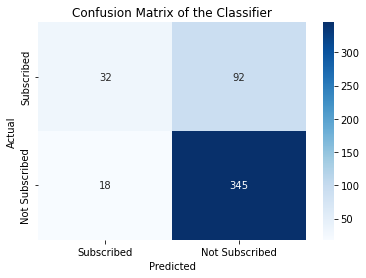

In [34]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['Subscribed', 'Not Subscribed'])

<h4>AUC Score</h4>

In [35]:
# area under the roc curve (auc)
print(roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

0.6042


In [36]:
# zipping each feature name to its coefficient
logreg_model_values = zip(characters[candidate_dict['logit_sig_2']].columns,
                          logreg_fit.coef_.ravel().round(decimals = 2))


# setting up a placeholder list to store model features
logreg_model_lst = [('intercept', logreg_fit.intercept_[0].round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in logreg_model_values:
    logreg_model_lst.append(val)
    

# checking the results
for pair in logreg_model_lst:
    print(pair)

('intercept', -1.54)
('book1_A_Game_Of_Thrones', -0.63)
('book2_A_Clash_Of_Kings', -0.44)
('book3_A_Storm_Of_Swords', -0.39)
('book4_A_Feast_For_Crows', 1.54)
('book5_A_Dance_with_Dragons', -0.06)
('isAliveMother', 0.66)
('isAliveFather', -0.71)
('isAliveHeir', 1.76)
('house_Arryn', -0.48)
('house_Baratheon', 0.34)
('house_Greyjoy', -0.72)
('house_Lannister', -0.47)
('house_Martell', 0.43)
('house_Stark', 0.49)
('house_Targaryen', -1.63)
('house_Tully', -0.82)
('house_Tyrell', 0.9)


<h4>Tuned Logic</h4>

In [37]:
# INSTANTIATING a logistic regression model with default values
lr_default = LogisticRegression(solver = 'lbfgs',
                                C = 1.0,
                                warm_start = False,
                                random_state = 219)

# FITTING the training data
lr_default_fit = lr_default.fit(x_train, y_train)


# PREDICTING based on the testing set
lr_default_pred = lr_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_default_fit.score(x_test, y_test).round(4))


# SCORING with AUC
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = lr_default_pred).round(4))


# saving scoring data for future use
logreg_train_score = lr_default_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = lr_default_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = lr_default_pred).round(4)

Training ACCURACY: 0.769
Testing  ACCURACY: 0.7741
AUC Score        : 0.6042


<h4>RansomizedSearchCV</h4>

In [38]:
########################################
# RandomizedSearchCV
########################################

# declaring a hyperparameter space
C_space          = pd.np.arange(0.1, 5.0, 0.1)
warm_start_space = [True, False]
solver_space     = ['newton-cg', 'sag', 'lbfgs']


# creating a hyperparameter grid
param_grid = {'C'          : C_space,
              'warm_start' : warm_start_space,
              'solver'     : solver_space}


# INSTANTIATING the model object without hyperparameters
lr_tuned = LogisticRegression(random_state = 219,
                              max_iter     = 250)


# GridSearchCV object
lr_tuned_cv = RandomizedSearchCV(estimator           = lr_tuned,   # the model object
                                 param_distributions = param_grid, # parameters to tune
                                 cv                  = 3,          # how many folds in cross-validation
                                 n_iter              = 50,        # number of combinations of hyperparameters to try
                                 random_state        = 219,        # starting point for random sequence
                                 scoring = make_scorer(
                                           roc_auc_score,
                                           needs_threshold = False)) # scoring criteria (AUC)


# FITTING to the FULL DATASET (due to cross-validation)
lr_tuned_cv.fit(characters_origin, characters_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", lr_tuned_cv.best_params_)
print("Tuned CV AUC      :", lr_tuned_cv.best_score_.round(4))

/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/1930556432.py:6: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  C_space          = pd.np.arange(0.1, 5.0, 0.1)


Tuned Parameters  : {'warm_start': True, 'solver': 'newton-cg', 'C': 3.0000000000000004}
Tuned CV AUC      : 0.5798


In [39]:
# checking the best estimator for the model
lr_tuned_cv.best_estimator_

LogisticRegression(C=3.0000000000000004, max_iter=250, random_state=219,
                   solver='newton-cg', warm_start=True)

In [40]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
lr_tuned = lr_tuned_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
lr_tuned_pred = lr_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', lr_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', lr_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                  y_score = lr_tuned_pred).round(4))


# saving scoring data for future use
lr_tuned_train_score = lr_tuned.score(x_train, y_train).round(4) # accuracy
lr_tuned_test_score  = lr_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
lr_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = lr_tuned_pred).round(4) # auc

Training ACCURACY: 0.7663
Testing  ACCURACY: 0.7906
AUC Score        : 0.6259


In [41]:
# unpacking the confusion matrix
lr_tuned_tn, \
lr_tuned_fp, \
lr_tuned_fn, \
lr_tuned_tp = confusion_matrix(y_true = y_test, y_pred = lr_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {lr_tuned_tn}
False Positives: {lr_tuned_fp}
False Negatives: {lr_tuned_fn}
True Positives : {lr_tuned_tp}
""")


True Negatives : 36
False Positives: 88
False Negatives: 14
True Positives : 349



In [42]:
# comparing results
print(f"""
Model         AUC Score       TN, FP, FN, TP
-----         ---------       --------------
Logistic      {logreg_auc_score}      {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR      {lr_tuned_auc}         {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR'],
           
    'AUC Score'     : [logreg_auc_score, lr_tuned_auc],
    
    'Training Accuracy' : [logreg_train_score, lr_tuned_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, lr_tuned_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)



Model         AUC Score       TN, FP, FN, TP
-----         ---------       --------------
Logistic      0.6042      (32, 92, 18, 345)
Tuned LR      0.6259         (36, 88, 14, 349)




In [43]:
# declaring model performance objects
lr_train_acc = lr_tuned.score(x_train, y_train).round(4)
lr_test_acc  = lr_tuned.score(x_test, y_test).round(4)
lr_auc       = roc_auc_score(y_true  = y_test,
                             y_score = lr_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned LR',
                           'Training Accuracy' : lr_train_acc,
                           'Testing Accuracy'  : lr_test_acc,
                           'AUC Score'         : lr_auc,
                           'Confusion Matrix'  : (lr_tuned_tn,
                                                  lr_tuned_fp,
                                                  lr_tuned_fn,
                                                  lr_tuned_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6042,0.7690,0.7741,"(32, 92, 18, 345)"
1,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"
2,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"


<h3>Display Tree</h3>

In [44]:
########################################
# display_tree
########################################
def display_tree(tree, feature_df, height = 500, width = 800):
    """
    PARAMETERS
    ----------
    tree       : fitted tree model object
        fitted CART model to visualized
    feature_df : DataFrame
        DataFrame of explanatory features (used to generate labels)
    height     : int, default 500
        height in pixels to which to constrain image in html
    width      : int, default 800
        width in pixels to which to constrain image in html
    """

    # visualizing the tree
    dot_data = StringIO()

    
    # exporting tree to graphviz
    export_graphviz(decision_tree      = tree,
                    out_file           = dot_data,
                    filled             = True,
                    rounded            = True,
                    special_characters = True,
                    feature_names      = feature_df.columns)


    # declaring a graph object
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


    # creating image
    img = Image(graph.create_png(),
                height = height,
                width  = width)
    
    return img




<h4>Full Tree</h4>

In [45]:
# train/test split with the Full model
characters_origin   =  characters.loc[ : , candidate_dict['logit_sig_2']]
characters_response =  characters.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            characters_origin,
            characters_response,
            test_size    = 0.10,
            random_state = 219,
            stratify     = characters_response)


In [46]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                    y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                    y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy

# displaying and saving the gap between training and testing
print('Full Tree Train-Test Gap :', abs(full_tree_train_score - full_tree_test_score).round(4))
full_tree_test_gap = abs(full_tree_train_score - full_tree_test_score).round(4)

# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.7967
Full Tree Testing ACCURACY : 0.7949
Full Tree AUC Score: 0.6459
Full Tree Train-Test Gap : 0.0018


In [47]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 7
True Positives : 138



<h4>Pruned Tree</h4>

In [48]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 5,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy

# displaying and saving the gap between training and testing
print('Pruned Tree Train-Test Gap :', abs(pruned_tree_train_score - pruned_tree_test_score).round(4))
pruned_tree_test_gap = abs(pruned_tree_train_score - pruned_tree_test_score).round(4)


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pred).round(4) # auc

Training ACCURACY: 0.7607
Testing  ACCURACY: 0.8205
AUC Score        : 0.6631
Pruned Tree Train-Test Gap : 0.0598


In [49]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 2
True Positives : 143



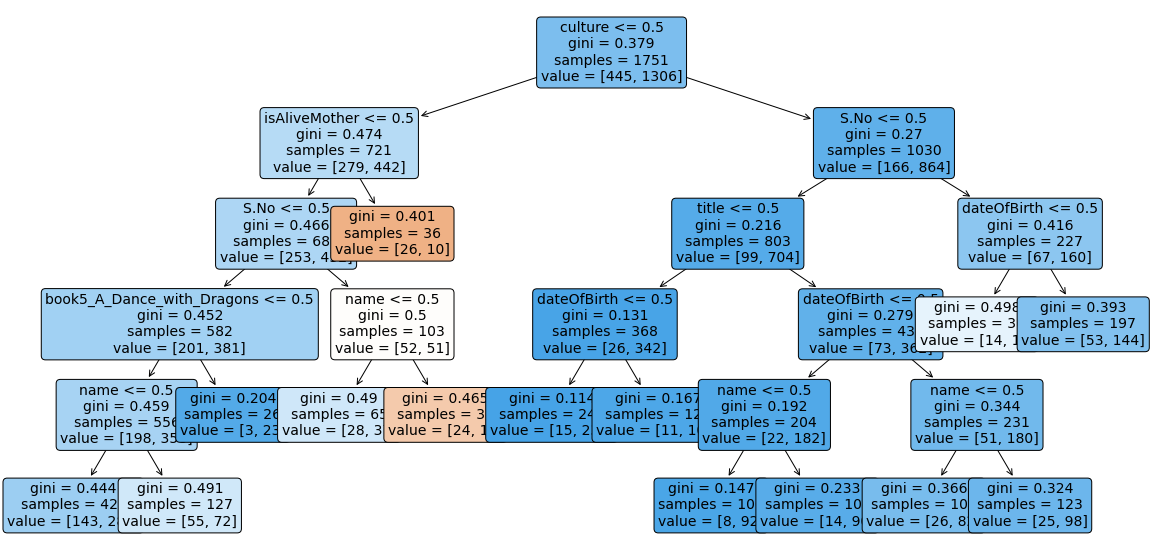

In [50]:
# setting figure size
plt.figure(figsize=(20, 10)) # adjusting to better fit the visual


# developing a plotted tree
plot_tree(decision_tree = tree_pruned_fit, # changing to pruned_tree_fit
          feature_names = characters.columns,
          filled        = True, 
          rounded       = True, 
          fontsize      = 14)


# rendering the plot
plt.show()

/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/565253471.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


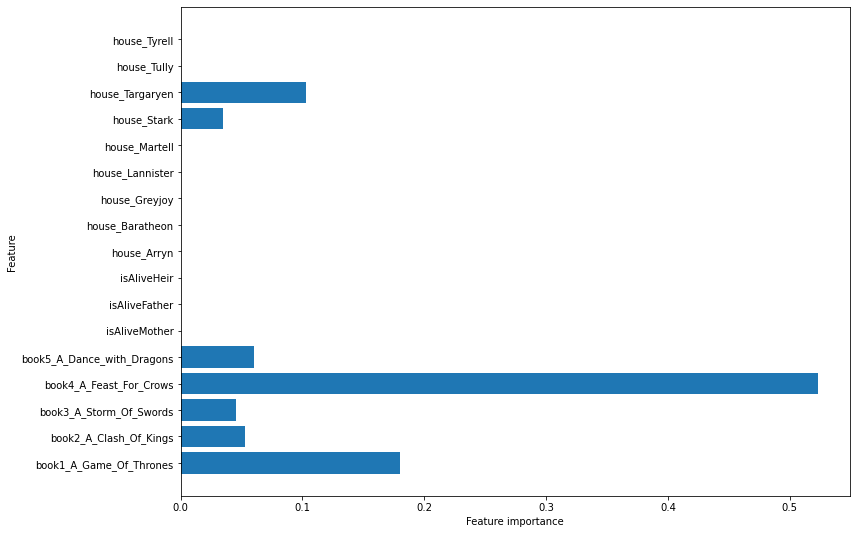

In [51]:
# plotting feature importance
plot_feature_importances(tree_pruned_fit,
                         train  = x_train,
                         export = False)

In [52]:
# comparing results
print(f"""
Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      {logreg_auc_score}         {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR      {lr_auc}                    {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Full Tree     {full_tree_auc_score}       {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree   {pruned_tree_auc_score}     {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}

""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR','Full Tree', 'Pruned Tree'],
           
    'AUC Score'     : [logreg_auc_score, lr_auc, full_tree_auc_score, 
                       pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, lr_train_acc, full_tree_train_score,
                           pruned_tree_train_score ],
           
    'Testing Accuracy'  : [logreg_test_score, lr_test_acc, full_tree_test_score,
                           pruned_tree_test_score, ],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model         AUC Score      TN, FP, FN, TP
-----         ---------      --------------
Logistic      0.6042         (32, 92, 18, 345)
Tuned LR      0.6259                    (36, 88, 14, 349)
Full Tree     0.6459       (17, 33, 7, 138)
Pruned Tree   0.6631     (17, 33, 2, 143)




<h4>Tuned Tree</h4>

In [53]:
# declaring a hyperparameter space
criterion_space = ['gini']
splitter_space  = ['random']
depth_space     = pd.np.arange(7)
leaf_space      = pd.np.arange(1, 31, 3)


# creating a hyperparameter grid
param_grid = {'criterion'        : criterion_space,
              'splitter'         : splitter_space,
              'max_depth'        : depth_space,
              'min_samples_leaf' : leaf_space}


# INSTANTIATING the model object without hyperparameters
tuned_tree = DecisionTreeClassifier(random_state = 219)


# RandomizedSearchCV object
tuned_tree_cv = RandomizedSearchCV(estimator             = tuned_tree,
                                   param_distributions   = param_grid,
                                   cv                    = 3,
                                   n_iter                = 150,
                                   n_jobs                = -1,
                                   random_state          = 219,
                                   scoring = make_scorer(roc_auc_score,
                                             needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
tuned_tree_cv.fit(characters_origin, characters_response)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", tuned_tree_cv.best_params_)
print("Tuned Training AUC:", tuned_tree_cv.best_score_.round(4))

/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/1026925196.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space     = pd.np.arange(7)
/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/1026925196.py:5: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space      = pd.np.arange(1, 31, 3)
/Users/jerryadaji/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:285: UserWarning: The total space of parameters 70 is smaller than n_iter=150. Running 70 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Tuned Parameters  : {'splitter': 'random', 'min_samples_leaf': 16, 'max_depth': 6, 'criterion': 'gini'}
Tuned Training AUC: 0.5827


/Users/jerryadaji/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan 0.5        0.5
 0.5        0.5        0.5        0.5        0.5        0.5
 0.5        0.5        0.51622835 0.51622835 0.51622835 0.51622835
 0.51622835 0.51622835 0.51622835 0.51622835 0.51622835 0.51622835
 0.53094368 0.53362963 0.53362963 0.55472697 0.55472697 0.53929997
 0.53929997 0.53929997 0.53631558 0.53631558 0.56009531 0.56069076
 0.55541568 0.55949843 0.55949843 0.54407143 0.54407143 0.54407143
 0.54746904 0.54746904 0.56479576 0.56809726 0.55984207 0.55915336
 0.55915336 0.54407143 0.54407143 0.57297409 0.57540752 0.57540752
 0.56908583 0.57075883 0.57322092 0.56082921 0.56082921 0.58268484
 0.57297409 0.57297409 0.57540752 0.57540752]
  warnings.warn(


In [54]:
# building a model based on hyperparameter tuning results

# INSTANTIATING a logistic regression model with tuned values
tree_tuned = tuned_tree_cv.best_estimator_


# FIT step is not needed


# PREDICTING based on the testing set
tree_tuned_pred = tree_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', tree_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_tuned_pred).round(4))


# saving scoring data for future use
tree_tuned_train_score = tree_tuned.score(x_train, y_train).round(4) # accuracy
tree_tuned_test_score  = tree_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
tree_tuned_auc         = roc_auc_score(y_true  = y_test,
                                     y_score = tree_tuned_pred).round(4) # auc

Training ACCURACY: 0.7624
Testing  ACCURACY: 0.8154
AUC Score        : 0.6597


In [55]:
# unpacking the confusion matrix
tuned_tree_tn, \
tuned_tree_fp, \
tuned_tree_fn, \
tuned_tree_tp = confusion_matrix(y_true = y_test, y_pred = tree_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_tree_tn}
False Positives: {tuned_tree_fp}
False Negatives: {tuned_tree_fn}
True Positives : {tuned_tree_tp}
""")


True Negatives : 17
False Positives: 33
False Negatives: 3
True Positives : 142



In [56]:
# declaring model performance objects
tree_train_acc = tree_tuned.score(x_train, y_train).round(4)
tree_test_acc  = tree_tuned.score(x_test, y_test).round(4)
tree_auc       = roc_auc_score(y_true  = y_test,
                              y_score = tree_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned Tree',
                           'Training Accuracy' : tree_train_acc,
                           'Testing Accuracy'  : tree_test_acc,
                           'AUC Score'         : tree_auc,
                           'Confusion Matrix'  : (tuned_tree_tn,
                                                  tuned_tree_fp,
                                                  tuned_tree_fn,
                                                  tuned_tree_tp)},
                           ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6042,0.7690,0.7741,"(32, 92, 18, 345)"
1,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"
2,Full Tree,0.6459,0.7967,0.7949,"(17, 33, 7, 138)"
3,Pruned Tree,0.6631,0.7607,0.8205,"(17, 33, 2, 143)"
4,Tuned Tree,0.6597,0.7624,0.8154,"(17, 33, 3, 142)"


<h3>Random Forest</h3>

<h4>Base Forest</h4>

In [57]:
# train/test split with the logit_full variables
characters_data   =  characters.loc[ : , candidate_dict ['x_variables']]
characters_target =  characters.loc[ :, 'isAlive']


# train/test split
x_train, x_test, y_train, y_test = train_test_split(
            characters_data,
            characters_target,
            random_state = 219,
            test_size    = 0.1,
            stratify     = characters_target)

In [58]:
# INSTANTIATING a random forest model with default values
rf_default = RandomForestClassifier(n_estimators     = 100,
                                    criterion        = 'gini',
                                    max_depth        = None,
                                    min_samples_leaf = 1,
                                    bootstrap        = True,
                                    warm_start       = False,
                                    random_state     = 219)

In [59]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', rf_default_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', rf_default_fit.score(x_test, y_test).round(4))

rf_default_train = rf_default_fit.score(x_train, y_train).round(4)
rf_default_test = rf_default_fit.score(x_test, y_test).round(4)


# displaying and saving the gap between training and testing
print('Train-Test Gap   :', abs(rf_default_train - rf_default_test).round(4))
rf_default_test_gap = abs(rf_default_train - rf_default_test).round(4)


# saving AUC score
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = rf_default_fit_pred).round(4))

Training ACCURACY: 0.7556
Testing  ACCURACY: 0.7692
Train-Test Gap   : 0.0136
AUC Score        : 0.5566


/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/565253471.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


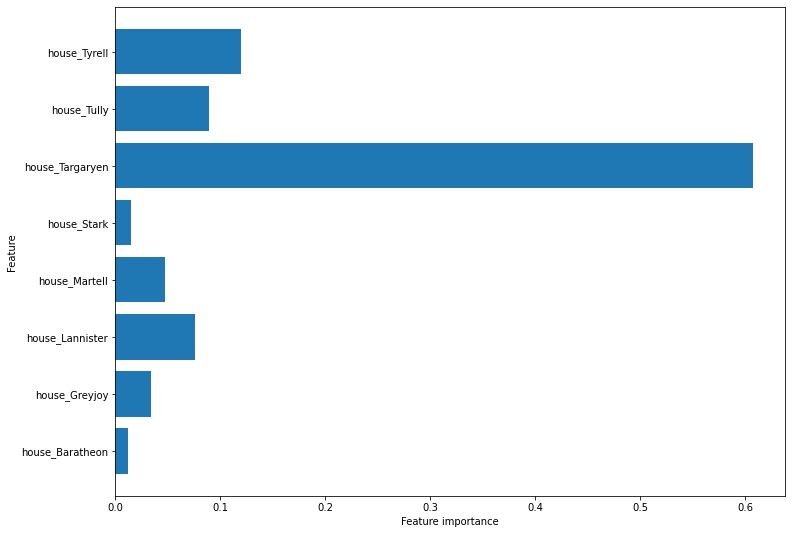

In [60]:
# plotting feature importances
plot_feature_importances(model = rf_default_fit,
                        train = x_train,
                        export = False)

In [61]:
# unpacking the confusion matrix
rf_tn, \
rf_fp, \
rf_fn, \
rf_tp = confusion_matrix(y_true = y_test, y_pred = rf_default_fit_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {rf_tn}
False Positives: {rf_fp}
False Negatives: {rf_fn}
True Positives : {rf_tp}
""")


True Negatives : 6
False Positives: 44
False Negatives: 1
True Positives : 144



In [62]:
# declaring model performance objects
rf_train_acc = rf_default_fit.score(x_train, y_train).round(4)
rf_test_acc  = rf_default_fit.score(x_test, y_test).round(4)
rf_auc       = roc_auc_score(y_true  = y_test,
                             y_score = rf_default_fit_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Random Forest (full)',
                           'Training Accuracy'  : rf_train_acc,
                           'Testing Accuracy'   : rf_test_acc,
                           'AUC Score'          : rf_auc,
                           'Confusion Matrix'   : (rf_tn,
                                                   rf_fp,
                                                   rf_fn,
                                                   rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6042,0.7690,0.7741,"(32, 92, 18, 345)"
1,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"
2,Full Tree,0.6459,0.7967,0.7949,"(17, 33, 7, 138)"
3,Pruned Tree,0.6631,0.7607,0.8205,"(17, 33, 2, 143)"
4,Tuned Tree,0.6597,0.7624,0.8154,"(17, 33, 3, 142)"
5,Random Forest (full),0.5566,0.7556,0.7692,"(6, 44, 1, 144)"


In [63]:
#Declaring variables
characters_data   =  characters.loc[ : , candidate_dict['logit_full']]
characters_target =  characters.loc[ : , 'isAlive']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            characters_data,
            characters_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = characters_response)


# merging training data for statsmodels
characters_train = pd.concat([x_train, y_train], axis = 1)


In [64]:
# FITTING the training data
rf_default_fit = rf_default.fit(x_train, y_train)


# PREDICTING based on the testing set
rf_default_fit_pred = rf_default_fit.predict(x_test)


# declaring a hyperparameter space
estimator_space  = pd.np.arange(1000)
leaf_space       = pd.np.arange(1, 31, 10)
criterion_space  = ['gini']
bootstrap_space  = [False]
warm_start_space = [True]
depth_space      = pd.np.arange(5)

# creating a hyperparameter grid
param_grid = {'n_estimators'     : estimator_space,
              'min_samples_leaf' : leaf_space,
              'criterion'        : criterion_space,
              'bootstrap'        : bootstrap_space,
              'warm_start'       : warm_start_space,
              'max_depth'        : depth_space}


# INSTANTIATING the model object without hyperparameters
forest_grid = RandomForestClassifier(random_state = 219)


# GridSearchCV object
forest_cv = RandomizedSearchCV(estimator           = forest_grid,
                               param_distributions = param_grid,
                               cv         = 3,
                               n_iter     = 10,
                               n_jobs     = -1,
                               scoring    = make_scorer(roc_auc_score,
                                            needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
forest_cv.fit(characters_data, characters_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", forest_cv.best_params_)
print("Tuned Training AUC:", forest_cv.best_score_.round(4))

/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/2758532224.py:10: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space  = pd.np.arange(1000)
/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/2758532224.py:11: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  leaf_space       = pd.np.arange(1, 31, 10)
/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/2758532224.py:15: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space      = pd.np.arange(5)
/Users/jerryadaji/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [0.5        0.54474217 0.55885564 0.57462414        nan 0.5010101
    

Tuned Parameters  : {'warm_start': True, 'n_estimators': 450, 'min_samples_leaf': 21, 'max_depth': 4, 'criterion': 'gini', 'bootstrap': False}
Tuned Training AUC: 0.5746


In [65]:
# best estimators based on RandomizedSearchCV
forest_cv.best_estimator_

RandomForestClassifier(bootstrap=False, max_depth=4, min_samples_leaf=21,
                       n_estimators=450, random_state=219, warm_start=True)

In [66]:
# building a model based on hyperparameter tuning results

# INSTANTIATING with best_estimator
forest_tuned = forest_cv.best_estimator_


# FIT step not needed


# PREDICTING based on the testing set
forest_tuned_pred = forest_tuned.predict(x_test)


# SCORING the results
print('Forest Tuned Training ACCURACY:', forest_tuned.score(x_train, y_train).round(4))
print('Forest Tuned Testing  ACCURACY:', forest_tuned.score(x_test, y_test).round(4))
print('Forest Tuned AUC Score        :', roc_auc_score(y_true  = y_test,
                                                       y_score = forest_tuned_pred).round(4))


# saving scoring data for future use
forest_tuned_train_score = forest_tuned.score(x_train, y_train).round(4) # accuracy
forest_tuned_test_score  = forest_tuned.score(x_test, y_test).round(4)   # accuracy


# saving the AUC score
forest_tuned_auc = roc_auc_score(y_true  = y_test,
                                 y_score = forest_tuned_pred).round(4) # auc

Forest Tuned Training ACCURACY: 0.7887
Forest Tuned Testing  ACCURACY: 0.8103
Forest Tuned AUC Score        : 0.63


/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/565253471.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


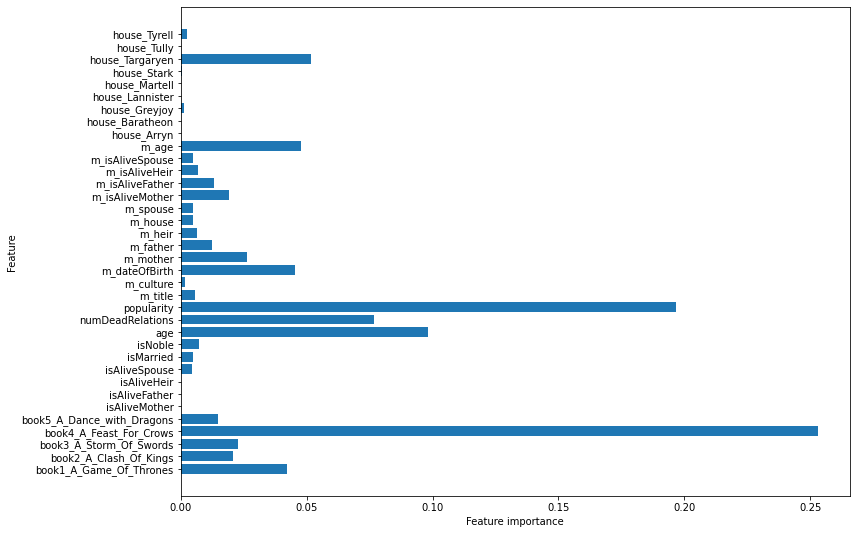

In [67]:
# plotting feature importances
plot_feature_importances(forest_tuned,
                         train = x_train,
                         export = False)

In [68]:
# unpacking the confusion matrix
tuned_rf_tn, \
tuned_rf_fp, \
tuned_rf_fn, \
tuned_rf_tp = confusion_matrix(y_true = y_test, y_pred = forest_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tuned_rf_tn}
False Positives: {tuned_rf_fp}
False Negatives: {tuned_rf_fn}
True Positives : {tuned_rf_tp}
""")


True Negatives : 13
False Positives: 37
False Negatives: 0
True Positives : 145



In [69]:
# declaring model performance objects
tuned_rf_train_acc = forest_tuned.score(x_train, y_train).round(4)
tuned_rf_test_acc  = forest_tuned.score(x_test, y_test).round(4)
tuned_rf_auc       = roc_auc_score(y_true  = y_test,
                                   y_score = forest_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'         : 'Tuned Random Forest (Full)',
                           'Training Accuracy'  : tuned_rf_train_acc,
                           'Testing Accuracy'   : tuned_rf_test_acc,
                           'AUC Score'          : tuned_rf_auc,
                           'Confusion Matrix'   : (tuned_rf_tn,
                                                   tuned_rf_fp,
                                                   tuned_rf_fn,
                                                   tuned_rf_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6042,0.7690,0.7741,"(32, 92, 18, 345)"
1,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"
2,Full Tree,0.6459,0.7967,0.7949,"(17, 33, 7, 138)"
3,Pruned Tree,0.6631,0.7607,0.8205,"(17, 33, 2, 143)"
4,Tuned Tree,0.6597,0.7624,0.8154,"(17, 33, 3, 142)"
5,Random Forest (full),0.5566,0.7556,0.7692,"(6, 44, 1, 144)"
6,Tuned Random Forest (Full),0.6300,0.7887,0.8103,"(13, 37, 0, 145)"


<h3>Gradiant Boosting model (GBM)</h3>

<h4>GBM Base</h4>

In [70]:
# INSTANTIATING the model object without hyperparameters
full_gbm_default = GradientBoostingClassifier(loss          = 'deviance',
                                              learning_rate = 0.1,
                                              n_estimators  = 100,
                                              criterion     = 'friedman_mse',
                                              max_depth     = 3,
                                              warm_start    = False,
                                              random_state  = 219)


# FIT step is needed as we are not using .best_estimator
full_gbm_default_fit = full_gbm_default.fit(x_train, y_train)


# PREDICTING based on the testing set
full_gbm_default_pred = full_gbm_default_fit.predict(x_test)


# SCORING the results
print('Training ACCURACY:', full_gbm_default_fit.score(x_train, y_train).round(4))
print('Testing ACCURACY :', full_gbm_default_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_gbm_default_pred).round(4))

Training ACCURACY: 0.8435
Testing ACCURACY : 0.8462
AUC Score        : 0.7328


In [71]:
# unpacking the confusion matrix
gbm_default_tn, \
gbm_default_fp, \
gbm_default_fn, \
gbm_default_tp = confusion_matrix(y_true = y_test, y_pred = full_gbm_default_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_default_tn}
False Positives: {gbm_default_fp}
False Negatives: {gbm_default_fn}
True Positives : {gbm_default_tp}
""")


True Negatives : 25
False Positives: 25
False Negatives: 5
True Positives : 140



In [72]:
# declaring model performance objects
gbm_train_acc = full_gbm_default_fit.score(x_train, y_train).round(4)
gbm_test_acc  = full_gbm_default_fit.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = full_gbm_default_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'       : 'GBM (Full)',
                          'Training Accuracy' : gbm_train_acc,
                          'Testing Accuracy'  : gbm_test_acc,
                          'AUC Score'         : gbm_auc,
                          'Confusion Matrix'  : (gbm_default_tn,
                                                 gbm_default_fp,
                                                 gbm_default_fn,
                                                 gbm_default_tp)},
                          ignore_index = True)

# Make a copy
gbm_train_acc_full = gbm_train_acc
gbm_test_acc_full = gbm_test_acc
gbm_auc_full = gbm_auc
gbm_default_tn_full = gbm_default_tn
gbm_default_fp_full = gbm_default_fp
gbm_default_fn_full = gbm_default_fn
gbm_default_tp_full = gbm_default_tp

# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6042,0.7690,0.7741,"(32, 92, 18, 345)"
1,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"
2,Full Tree,0.6459,0.7967,0.7949,"(17, 33, 7, 138)"
3,Pruned Tree,0.6631,0.7607,0.8205,"(17, 33, 2, 143)"
4,Tuned Tree,0.6597,0.7624,0.8154,"(17, 33, 3, 142)"
5,Random Forest (full),0.5566,0.7556,0.7692,"(6, 44, 1, 144)"
6,Tuned Random Forest (Full),0.6300,0.7887,0.8103,"(13, 37, 0, 145)"
7,GBM (Full),0.7328,0.8435,0.8462,"(25, 25, 5, 140)"


<h4>GBM Tuned</h4>

In [73]:
#Declaring variables
characters_data   =  characters.loc[ : , candidate_dict['x_variables']]
characters_target =  characters.loc[ : , 'isAlive']


# train-test split with stratification
x_train, x_test, y_train, y_test = train_test_split(
            characters_data,
            characters_target,
            test_size    = 0.25,
            random_state = 219,
            stratify     = characters_target)


# merging training data for statsmodels
characters_train = pd.concat([x_train, y_train], axis = 1)


In [74]:
# declaring a hyperparameter space
learn_space        = pd.np.arange(0.1, 2.0, 0.2)
estimator_space    = pd.np.arange(350)
depth_space        = pd.np.arange(4)
warm_start_space   = [True, False]

# creating a hyperparameter grid
param_grid = {'learning_rate' : learn_space,
              'max_depth'     : depth_space,
              'n_estimators'  : estimator_space,
              'warm_start'     : warm_start_space}


# INSTANTIATING the model object without hyperparameters
full_gbm_grid = GradientBoostingClassifier(random_state = 219)


# GridSearchCV object
full_gbm_cv = RandomizedSearchCV(estimator     = full_gbm_grid,
                           param_distributions = param_grid,
                           cv                  = 3,
                           n_iter              = 50,
                            n_jobs             = -1,
                           random_state        = 219,
                           scoring             = make_scorer(roc_auc_score,
                                                 needs_threshold = False))


# FITTING to the FULL DATASET (due to cross-validation)
full_gbm_cv.fit(characters_data, characters_target)


# PREDICT step is not needed


# printing the optimal parameters and best score
print("Tuned Parameters  :", full_gbm_cv.best_params_)
print("Tuned Training AUC:", full_gbm_cv.best_score_.round(4))

/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/1253198033.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  learn_space        = pd.np.arange(0.1, 2.0, 0.2)
/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/1253198033.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  estimator_space    = pd.np.arange(350)
/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/1253198033.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  depth_space        = pd.np.arange(4)
/Users/jerryadaji/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. 

Tuned Parameters  : {'warm_start': True, 'n_estimators': 304, 'max_depth': 1, 'learning_rate': 0.5000000000000001}
Tuned Training AUC: 0.5395


/Users/jerryadaji/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan 0.53952241 0.51404174 0.50933559 0.53550496 0.5241506
 0.53952241 0.53952241 0.51404174 0.53952241 0.5241506         nan
 0.53952241 0.53952241 0.50933559 0.521809   0.5241506  0.53417489
        nan 0.53952241 0.51404174 0.53952241 0.51404174 0.53952241
 0.53952241 0.53952241 0.53952241        nan 0.53952241        nan
 0.53952241 0.53952241 0.52548067 0.53952241 0.5241506         nan
 0.53952241 0.50933559 0.50933559 0.53952241 0.53952241 0.53952241
 0.51537182 0.53952241 0.53417489 0.53952241 0.50933559 0.53952241
 0.53952241        nan]
  warnings.warn(


In [75]:
# checking the best estimator for the model
full_gbm_cv.best_estimator_

GradientBoostingClassifier(learning_rate=0.5000000000000001, max_depth=1,
                           n_estimators=304, random_state=219, warm_start=True)

In [76]:
# INSTANTIATING with best_estimator
gbm_tuned = full_gbm_cv.best_estimator_


# FIT step not needed


# PREDICTING based on the testing set
gbm_tuned_pred = gbm_tuned.predict(x_test)


# SCORING the results
print('Training ACCURACY:', gbm_tuned.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', gbm_tuned.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = gbm_tuned_pred).round(4))

# saving scoring data for future use
gbm_tuned_train_score = gbm_tuned.score(x_train, y_train).round(4) # accuracy
gbm_tuned_test_score  = gbm_tuned.score(x_test, y_test).round(4)   # accuracy


# saving AUC score
gbm_tuned_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = gbm_tuned_pred).round(4)

Training ACCURACY: 0.7587
Testing  ACCURACY: 0.7515
AUC Score        : 0.536


In [77]:
# unpacking the confusion matrix
gbm_tuned_tn, \
gbm_tuned_fp, \
gbm_tuned_fn, \
gbm_tuned_tp = confusion_matrix(y_true = y_test, y_pred = gbm_tuned_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {gbm_tuned_tn}
False Positives: {gbm_tuned_fp}
False Negatives: {gbm_tuned_fn}
True Positives : {gbm_tuned_tp}
""")


True Negatives : 12
False Positives: 112
False Negatives: 9
True Positives : 354



/var/folders/dr/m74lndt15h9770w6bcggxc2m0000gn/T/ipykernel_51369/565253471.py:22: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  plt.yticks(pd.np.arange(n_features), train.columns)


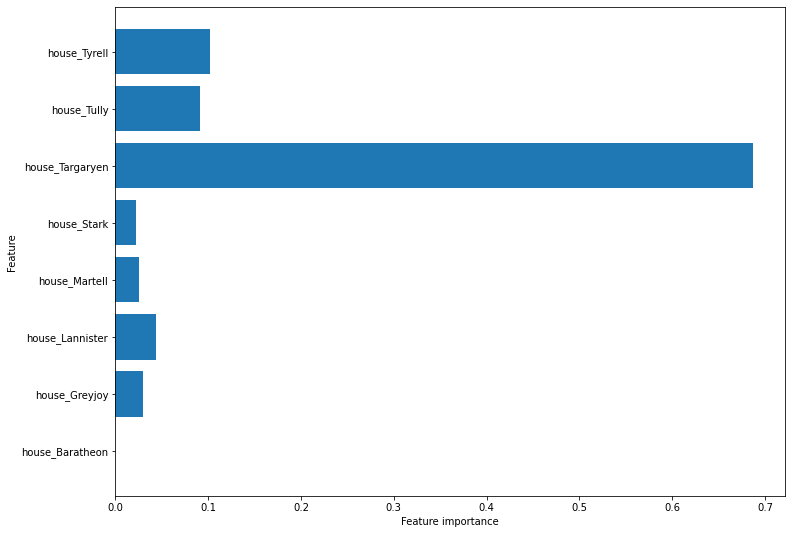

In [78]:
# plotting feature importances
plot_feature_importances(gbm_tuned,
                         train = x_train,
                         export = False)

In [79]:
# declaring model performance objects
gbm_train_acc = gbm_tuned.score(x_train, y_train).round(4)
gbm_test_acc  = gbm_tuned.score(x_test, y_test).round(4)
gbm_auc       = roc_auc_score(y_true  = y_test,
                              y_score = gbm_tuned_pred).round(4)


# appending to model_performance
model_performance = model_performance.append(
                          {'Model Name'        : 'Tuned GBM (Final Model)',
                          'Training Accuracy'  : gbm_train_acc,
                          'Testing Accuracy'   : gbm_test_acc,
                          'AUC Score'          : gbm_auc,
                          'Confusion Matrix'   : (gbm_tuned_tn,
                                                  gbm_tuned_fp,
                                                  gbm_tuned_fn,
                                                  gbm_tuned_tp)},
                          ignore_index = True)


# checking the results
model_performance

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
0,Logistic,0.6042,0.7690,0.7741,"(32, 92, 18, 345)"
1,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"
2,Full Tree,0.6459,0.7967,0.7949,"(17, 33, 7, 138)"
3,Pruned Tree,0.6631,0.7607,0.8205,"(17, 33, 2, 143)"
4,Tuned Tree,0.6597,0.7624,0.8154,"(17, 33, 3, 142)"
5,Random Forest (full),0.5566,0.7556,0.7692,"(6, 44, 1, 144)"
6,Tuned Random Forest (Full),0.6300,0.7887,0.8103,"(13, 37, 0, 145)"
7,GBM (Full),0.7328,0.8435,0.8462,"(25, 25, 5, 140)"
8,Tuned GBM (Final Model),0.5360,0.7587,0.7515,"(12, 112, 9, 354)"


In [80]:
model_performance.sort_values(by = 'AUC Score',
                              ascending = False)

,Model Name,AUC Score,Training Accuracy,Testing Accuracy,Confusion Matrix
7,GBM (Full),0.7328,0.8435,0.8462,"(25, 25, 5, 140)"
3,Pruned Tree,0.6631,0.7607,0.8205,"(17, 33, 2, 143)"
4,Tuned Tree,0.6597,0.7624,0.8154,"(17, 33, 3, 142)"
2,Full Tree,0.6459,0.7967,0.7949,"(17, 33, 7, 138)"
6,Tuned Random Forest (Full),0.6300,0.7887,0.8103,"(13, 37, 0, 145)"
1,Tuned LR,0.6259,0.7663,0.7906,"(36, 88, 14, 349)"
0,Logistic,0.6042,0.7690,0.7741,"(32, 92, 18, 345)"
5,Random Forest (full),0.5566,0.7556,0.7692,"(6, 44, 1, 144)"
8,Tuned GBM (Final Model),0.5360,0.7587,0.7515,"(12, 112, 9, 354)"


<h3>Model output</h3>

In [81]:
# Model Output
print(f"""
Model       Training Accuracy     Testing Accuracy      AUC Score       TN, FP, FN, TP
-----       --------------        ----------------      ----------      --------------
Logistic          {logreg_train_score}           {logreg_test_score}                {logreg_auc_score}          {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tuned LR          {lr_tuned_train_score}          {lr_tuned_test_score}                {lr_tuned_auc}          {lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp}
Full Tree         {full_tree_train_score}          {full_tree_test_score}                {full_tree_auc_score}          {full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp}
Pruned Tree       {pruned_tree_train_score}          {pruned_tree_test_score}                {pruned_tree_auc_score}          {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}
GBM Tuned         {gbm_tuned_train_score}          {gbm_tuned_test_score}                 {gbm_tuned_auc_score}          {gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp}
GBM Full (Final)  {gbm_train_acc_full}           {gbm_test_acc_full}                 {gbm_auc_full}          {gbm_default_tn_full, gbm_default_fp_full, gbm_default_fn_full, gbm_default_tp_full}
""")


# creating a dictionary for model results
model_performance = {
    
    'Model Name'    : ['Logistic', 'Tuned LR','Full Tree', 'Pruned Tree','GBM Tuned'],
           
    'AUC Score'     : [logreg_auc_score, lr_tuned_auc, full_tree_auc_score, 
                       pruned_tree_auc_score, gbm_tuned_auc_score ],
    
    'Training Accuracy' : [logreg_train_score, lr_tuned_train_score, full_tree_train_score,
                           pruned_tree_train_score, gbm_tuned_train_score ],
           
    'Testing Accuracy'  : [logreg_test_score, lr_tuned_test_score, full_tree_test_score,
                           pruned_tree_test_score, gbm_tuned_test_score ],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (lr_tuned_tn,lr_tuned_fp, lr_tuned_fn, lr_tuned_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp),
                           (gbm_tuned_tn, gbm_tuned_fp, gbm_tuned_fn, gbm_tuned_tp)]}




Model       Training Accuracy     Testing Accuracy      AUC Score       TN, FP, FN, TP
-----       --------------        ----------------      ----------      --------------
Logistic          0.769           0.7741                0.6042          (32, 92, 18, 345)
Tuned LR          0.7663          0.7906                0.6259          (36, 88, 14, 349)
Full Tree         0.7967          0.7949                0.6459          (17, 33, 7, 138)
Pruned Tree       0.7607          0.8205                0.6631          (17, 33, 2, 143)
GBM Tuned         0.7587          0.7515                 0.536          (12, 112, 9, 354)
GBM Full (Final)  0.8435           0.8462                 0.7328          (25, 25, 5, 140)

